In [15]:
from mocapact import observables
from mocapact.sb3 import utils
from mocapact.envs import tracking
from dm_control.locomotion.tasks.reference_pose import types

/Users/steve/Code/mocapact_conceptor/.venv_mocapact/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: 'bytes' object cannot be interpreted as an integer
  warnings.warn(
/Users/steve/Code/mocapact_conceptor/.venv_mocapact/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(


In [16]:
from IPython.display import HTML
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def visualize_images(images, show=True, to_file = None):
    fig, ax = plt.subplots()
    x = ax.imshow(images[0])

    def update(frame):
        x.set_data(images[frame])
        return x

    ani = FuncAnimation(fig, update, frames=range(len(images)), interval=50)
    if to_file is not None:
        ani.save(to_file, writer='imagemagick', fps=30)
    if show:
        display(HTML(ani.to_html5_video()))
    plt.close()

In [17]:
def get_speed(task, physics):
    xvel = task._walker.observables.torso_xvel(physics)
    yvel = task._walker.observables.torso_yvel(physics)
    speed = np.linalg.norm(np.array([xvel, yvel]))
    return speed

/Users/steve/Code/mocapact_conceptor/.venv_mocapact/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(
/Users/steve/Code/mocapact_conceptor/.venv_mocapact/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: 'bytes' object cannot be interpreted as an integer
  warnings.warn(


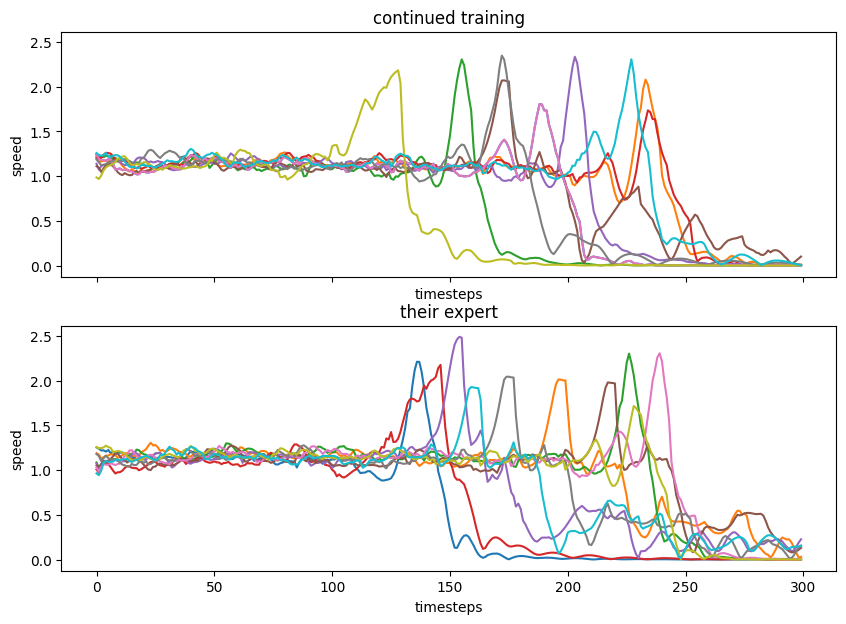

In [21]:
paths = {
    "continued training": "walk_warm_400steps/CMU_016_15-0-127/0/eval_rsi/model",
    "their expert": "../data/experts/CMU_016_15-0-127/eval_rsi/model",
}

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 7))
n_runs = 20
max_steps = 250

for idx, (name, expert_path) in enumerate(paths.items()):
    expert = utils.load_policy(expert_path, observables.TIME_INDEX_OBSERVABLES)

    dataset = types.ClipCollection(ids=['CMU_016_15'])
    env = tracking.MocapTrackingGymEnv(dataset)
    speeds = []
    for _ in range(n_runs):
        obs, done = env.reset(), False
        ims = []
        speed = []
        for _ in range(max_steps):
            action, _ = expert.predict(obs, deterministic=True)
            obs, rew, done, _ = env.step(action)
            ims.append(env.render())
            speed.append(get_speed(env._env.task, env._env.physics))
        speeds.append(speed)

    axs[idx].set_title(name)
    axs[idx].set_ylabel("speed")
    axs[idx].set_xlabel("timesteps")
    for speed in speeds:
        axs[idx].plot(speed)
plt.show()

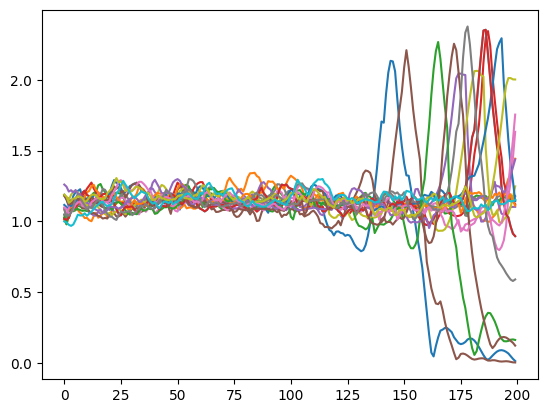

In [19]:
for speed in speeds:
    plt.plot(speed)
plt.show()

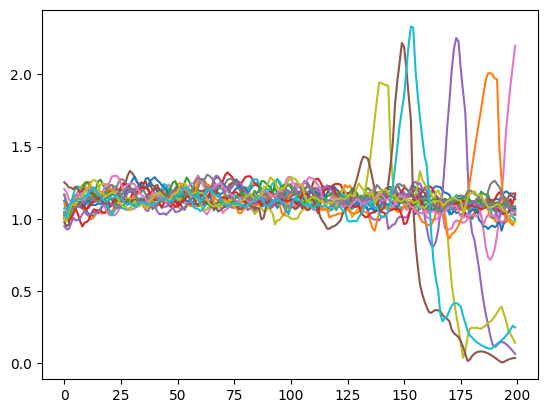

In [ ]:
plt.title()
for speed in speeds:
    plt.plot(speed)
plt.show()

In [11]:
visualize_images(ims)